<a href="https://colab.research.google.com/github/veeranjaneyaM/Cognifyz-Technologies-Machine-Learning-Internship/blob/main/Cognify_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
              Restaurant Count  Average Rating  Average Price Range
City                                                               
New Delhi                 5473        2.438845             1.621597
Gurgaon                   1118        2.651431             1.855993
Noida                     1080        2.036204             1.601852
Faridabad                  251        1.866932             1.454183
Ghaziabad                   25        2.852000             1.800000
Bhubaneshwar                21        3.980952             1.857143
Lucknow                     21        4.195238     

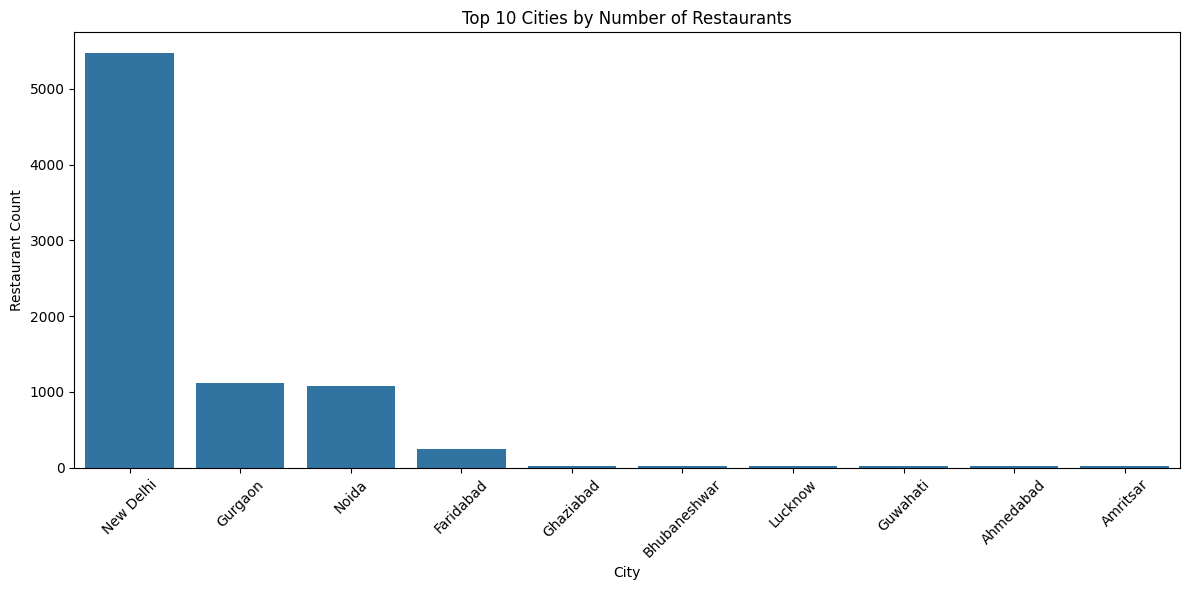

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load dataset
df = pd.read_csv("Dataset.csv")  # Use exact file name

# Step 1: Check and clean location data
print(df.columns)  # Ensure columns like 'Latitude', 'Longitude', 'City' exist
df = df.dropna(subset=['Latitude', 'Longitude'])

# Step 2: Plot on a map using Folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=2)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        popup=row['City']
    ).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

# Step 3: Group by city for stats
city_group = df.groupby('City').agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).rename(columns={
    'Restaurant Name': 'Restaurant Count',
    'Aggregate rating': 'Average Rating',
    'Price range': 'Average Price Range'
}).sort_values('Restaurant Count', ascending=False)

print(city_group.head(10))

# Step 4: Visualize city concentration
plt.figure(figsize=(12, 6))
top_cities = city_group.head(10)
sns.barplot(x=top_cities.index, y=top_cities['Restaurant Count'])
plt.title('Top 10 Cities by Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
